# Unit 2: Learning from Data

---

## Lesson 2.3: Linear Regression With a Real Dataset


In this lesson, we’ll use a real dataset to learn how to predict a person’s **salary** based on how many **years of experience** they have.


### What’s in the Dataset?

The dataset has **two columns**:

| YearsExperience | Salary     |
|-----------------|------------|
| 1.1             | 39343.00   |
| 1.3             | 46205.00   |
| 1.5             | 37731.00   |
| ...             | ...        |

- `YearsExperience`: How many years someone has worked
- `Salary`: How much money they earn (in dollars)

---

### What Will We Do?

We’ll use **Linear Regression** to build a model that predicts the salary of a person based on the years of experience.

For example,

If someone has 5.5 years of experience, what salary should they expect?

---

### Why Is This a Good Dataset for Linear Regression?

- There’s **one feature**: `YearsExperience`
- One target to predict: `Salary`
- The relationship is likely to be **linear**, meaning it can be modeled with a straight line.

---

### Quick Dataset Facts

- Number of rows: 30
- Format: `.csv` file (comma-separated values)
- Goal: Predict salary from years of experience

---

### Next Step

We'll:
1. Load the dataset using Pandas
2. Split the data into training data and testing data
3. Create a linear regression model
4. Train it
5. Make predictions
6. Determine its accuracy

## Coding

In [101]:
import pandas as pd

# this will be used to split the original data into training and testing data
from sklearn.model_selection import train_test_split

# our model
from sklearn.linear_model import LinearRegression

# used to determine the accuracy of our model
from sklearn.metrics import mean_squared_error, r2_score

# used to visualize our results
import matplotlib.pyplot as plt

# importing the dataset using pandas read_csv() function
train_df = pd.read_csv("Data/Salary_dataset.csv")

# setting Salary as the target variable (what we want to predict).
y = train_df["Salary"]

# setting YearsExperience as our feature (what we use to predict the salary)
X = train_df[["YearsExperience"]]

# creating train and test data, test_size=0.2 makes 80% of the data used for training and 20% of the data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train and y_train are used to train the model. The model is finding the relationship between YearsExperience and Salary

X_test and y_test are used to test the model. Our model's predictions based on X_test will be matched against the actual values in y_test

In [102]:
model = LinearRegression()

# training the model using .fit()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
# storing our predictions in a variable
y_preds = model.predict(X_test)

In [104]:
# Comparing our predictions to the actual values
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print("Mean Squared Error:", mse)
print("R-squared (Accuracy):", r2)

Mean Squared Error: 49830096.855908334
R-squared (Accuracy): 0.9024461774180498


## What Do These Numbers Mean?

### 1. Mean Squared Error (MSE)

- MSE tells us how far off our predictions are from the real answers.
- It measures the average squared difference between predicted and actual values.

If the model says:
- Predicted salary = $55,000
  
- Actual salary = $50,000  
- Error = 5,000 → then square it → 25,000,000

MSE averages all of these squared errors.

- **Lower MSE = better model**
- MSE = 0 means **perfect predictions**

## 2. R-squared (R²)

- R² tells us what percentage of the change in the target variable is explained by a change in the feature, in this case what percentage of the change in the salary is explained by the change in YearsExperience

- It's like a score from **0 to 1**
  - 1 = **perfect** prediction
  - 0 = **useless** model

---

## Visualization of Our Model

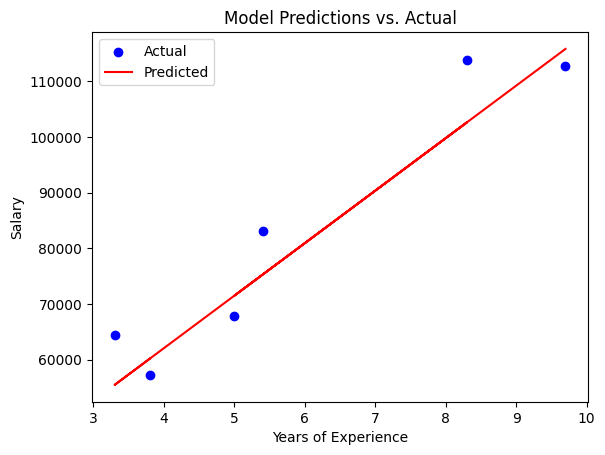

In [105]:
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_preds, color='red', label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Predictions vs. Actual")
plt.legend()
plt.show()